In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/twitter_training.csv', header=None)

# Rename columns if needed
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']
df.head()



,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


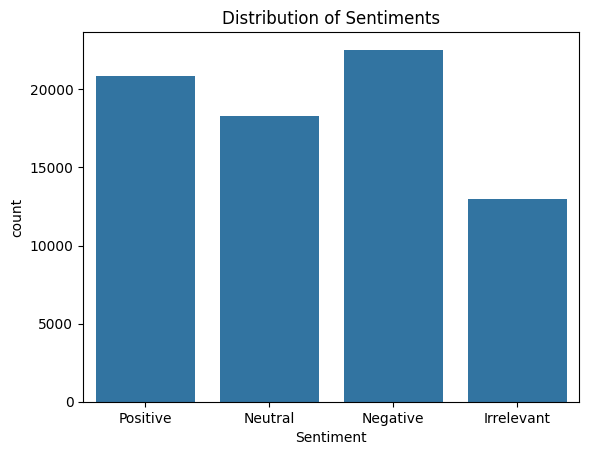

In [ ]:
# Check the distribution of sentiments
sns.countplot(x=df["Sentiment"])
plt.title('Distribution of Sentiments')
plt.show()


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tweepy as tw #for accessing Twitter API


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_cleaned=df.dropna()
df_cleaned.describe()

,Tweet_ID
count,73995.000000
mean,6430.333685
std,3737.655932
min,1.000000
25%,3194.000000
50%,6418.000000
75%,9595.000000
max,13200.000000


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

# Example usage
print("\nOriginal tweet ->", df_cleaned['Tweet_Content'][0])
print("\nProcessed tweet ->", tweet_to_words(df_cleaned['Tweet_Content'][0]))



Original tweet -> I am coming to the borders and I will kill you all,

Processed tweet -> ['come', 'border', 'kill']


In [ ]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, df_cleaned['Tweet_Content']))

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df_cleaned['Sentiment'])

print(X[0])  # Print the processed tweet
print(Y[0])  # Print the encoded label


['come', 'border', 'kill']
3


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target labels (Y)

y = pd.get_dummies(df_cleaned['Sentiment'])

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
                                preprocessor=lambda x: x,
                                tokenizer=lambda x: x)

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
print(list(count_vector.vocabulary_.keys())[:200])


['rainbow6gam', 'epic', 'one', 'game', 'gold', 'pic', 'facebook', 'com', 'ye', 'happen', 'dunno', 'guess', 'want', 'kill', 'stuff', 'instagram', 'http', 'co', 'load', 'fun', 'weekend', 'king', 'canyon', 'playapex', 'brought', 'card', 'back', 'night', 'realli', 'enjoy', 'teamwork', 'work', 'remind', 'heal', 'next', 'time', 'need', 'outrag', 'moral', 'disgust', 'fresh', 'blood', 'see', 'someon', 'stapl', 'amazon', 'book', 'profil', 'cri', 'tear', 'recent', 'mass', 'media', 'tragedi', 'know', 'alway', 'wish', 'bit', 'wors', 'quarantin', 'bore', 'af', 'play', 'call', 'duti', 'anyon', 'wanna', 'amaz', 'live', 'davematthewsbnd', 'verizon', 'unk', 'fuck', 'comput', 'peopl', 'ridicul', 'paper', 'websit', 'bullshit', 'easter', 'egg', 'two', 'outcom', 'cyberpunk', '2077', 'unless', 'get', 'delay', 'past', '2020', 'everyon', 'sad', 'world', 'burn', 'land', 'releas', 'bad', 'planet', 'well', 'awkward', 'sadden', 'mani', 'moment', 'dedic', 'talk', 'subject', 'thing', 'greater', 'import', 'fake', 'c

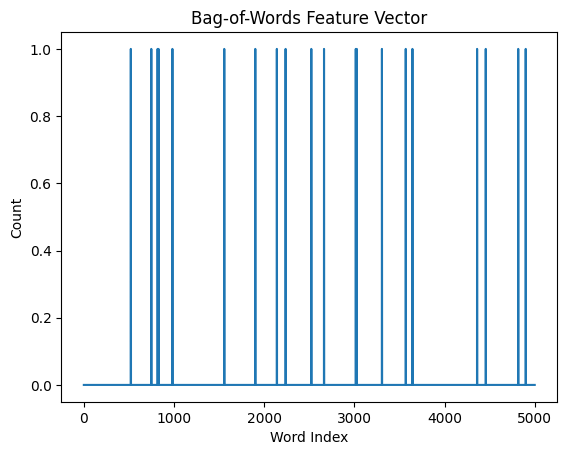

In [ ]:
import matplotlib.pyplot as plt

# Plot the BoW feature vector for the third tweet in the training set
plt.plot(X_train[2, :])
plt.xlabel('Word Index')
plt.ylabel('Count')
plt.title('Bag-of-Words Feature Vector')
plt.show()


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenizes the input text into sequences of integers and then
    pads each sequence to the same length.
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # Return sequences
    return X, tokenizer

print('Before Tokenization & Padding:\n', df_cleaned['Tweet_Content'][0])
X, tokenizer = tokenize_pad_sequences(df_cleaned['Tweet_Content'])
print('After Tokenization & Padding:\n', X[0])


Before Tokenization & Padding:
 I am coming to the borders and I will kill you all,
After Tokenization & Padding:
 [  2 120 404   3   1   4   2  52 434  12  27   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
import pickle

# Saving the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Loading the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


In [ ]:
# Assuming df_cleaned contains the necessary columns

y = pd.get_dummies(df_cleaned['Sentiment'])  # Target variable

# Splitting the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Printing the shapes of the sets
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)


Train Set -> (59196, 100) (59196, 4)
Validation Set -> (7399, 100) (7399, 4)
Test Set -> (7400, 100) (7400, 4)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from keras.optimizers import Adam

embedding_dim = 128  # Adjust as needed
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=True)))  # Cemo-LSTM modification
model.add(Bidirectional(LSTM(100)))  # Cemo-LSTM modification
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 spatial_dropout1d_2 (Spati  (None, 100, 128)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_2 (Bidirecti  (None, 100, 200)          183200    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 200)               240800    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 4)                 804       
                                                      

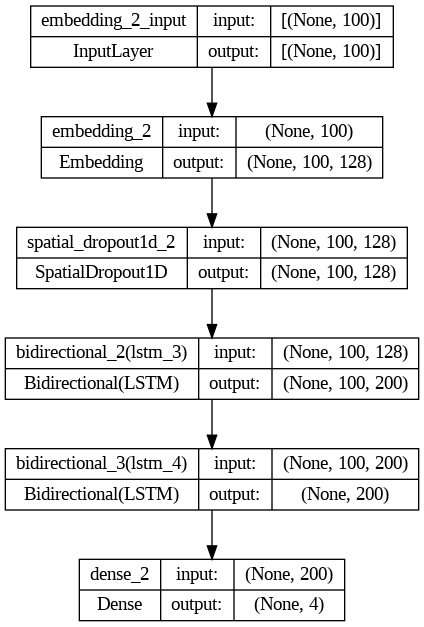

In [ ]:
import tensorflow as tf

# Assuming 'model' is your modified model
# Replace 'model' with the name of your actual model variable

# Plot the model architecture
tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
!jupyter notebook restart


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/twitter_training.csv')

# Rename columns if needed
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']
df_cleaned = df.dropna()

# Define the mapping of sentiment labels to numerical values
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2, 'Irrelevant': 3}
df_cleaned['Sentiment'] = df_cleaned['Sentiment'].map(sentiment_mapping)

# Tokenize text data
max_features = 10000  # Adjust as needed
max_len = 50  # Adjust as needed
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df_cleaned['Tweet_Content'].values)
X = tokenizer.texts_to_sequences(df_cleaned['Tweet_Content'].values)
X = pad_sequences(X, maxlen=max_len)

# Define labels
y = pd.get_dummies(df_cleaned['Sentiment']).values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model architecture
embedding_dim = 128  # Adjust as needed
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64  # Adjust as needed
epochs = 20 # Adjust as needed
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy * 100)

<ipython-input-3-1c3263f0cfc9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sentiment'] = df_cleaned['Sentiment'].map(sentiment_mapping)


Epoch 1/20
925/925 - 198s - loss: 0.9315 - accuracy: 0.6198 - val_loss: 0.7040 - val_accuracy: 0.7297 - 198s/epoch - 214ms/step
Epoch 2/20
925/925 - 171s - loss: 0.5682 - accuracy: 0.7845 - val_loss: 0.5582 - val_accuracy: 0.7934 - 171s/epoch - 185ms/step
Epoch 3/20
925/925 - 171s - loss: 0.4235 - accuracy: 0.8416 - val_loss: 0.4851 - val_accuracy: 0.8239 - 171s/epoch - 185ms/step
Epoch 4/20
925/925 - 170s - loss: 0.3401 - accuracy: 0.8730 - val_loss: 0.4609 - val_accuracy: 0.8365 - 170s/epoch - 183ms/step
Epoch 5/20
925/925 - 170s - loss: 0.2895 - accuracy: 0.8900 - val_loss: 0.4606 - val_accuracy: 0.8390 - 170s/epoch - 184ms/step
Epoch 6/20
925/925 - 171s - loss: 0.2541 - accuracy: 0.9036 - val_loss: 0.4285 - val_accuracy: 0.8544 - 171s/epoch - 185ms/step
Epoch 7/20
925/925 - 167s - loss: 0.2240 - accuracy: 0.9134 - val_loss: 0.4520 - val_accuracy: 0.8547 - 167s/epoch - 180ms/step
Epoch 8/20
925/925 - 165s - loss: 0.2024 - accuracy: 0.9223 - val_loss: 0.4321 - val_accuracy: 0.8614 - 

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert DataFrame to NumPy array
y_test_np = np.array(y_test)

# Predict labels
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test_np.argmax(axis=1), y_pred)
precision = precision_score(y_test_np.argmax(axis=1), y_pred, average='weighted')
recall = recall_score(y_test_np.argmax(axis=1), y_pred, average='weighted')
f1 = f1_score(y_test_np.argmax(axis=1), y_pred, average='weighted')

# Print accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


463/463 [==============================] - 11s 24ms/step
Accuracy: 0.8762754240151361
Precision: 0.8774527077386538
Recall: 0.8762754240151361
F1-score: 0.876405396010316


NameError: name 'model' is not defined